# Social Media as a Measurement Tool of Depression in Populations

In [1]:
from sklearn.svm import SVC 
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import copy
import string
import warnings
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import wordcloud


In [3]:
from xgboost import XGBClassifier


In [4]:
import xgboost as xgb

In [5]:
from wordcloud import WordCloud

In [6]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

/home/gsainicse/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
dataset = pd.read_csv("tweetdata1.csv",encoding='latin-1')
COLUMNS = ["target", "ids", "date", "flag", "user", "Text"]
dataset.columns = COLUMNS

In [8]:
data_ = copy.deepcopy(dataset)
positive_data = data_[data_.target==4].iloc[:80000,:]
negative_data = data_[data_.target==0].iloc[:80000,:]
data_subset = pd.concat([positive_data,negative_data],axis=0)

### Target

In [9]:
data_target=dataset.groupby('target')

In [10]:
dataset['target'].value_counts()

0    799994
4    248576
Name: target, dtype: int64

## Date


In [11]:
dataset.head()

,target,ids,date,flag,user,Text
0,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
1,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
2,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
3,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
4,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [12]:
sub_data = {'target': dataset['target'], 'date': dataset['date']}
dataframe = pd.DataFrame(sub_data)
dataframe.head()

,target,date
0,0,Mon Apr 06 22:20:03 PDT 2009
1,0,Mon Apr 06 22:20:03 PDT 2009
2,0,Mon Apr 06 22:20:05 PDT 2009
3,0,Mon Apr 06 22:20:09 PDT 2009
4,0,Mon Apr 06 22:20:16 PDT 2009


In [13]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

/home/gsainicse/anaconda3/lib/python3.6/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [14]:
hour = [ dataframe['date'][i].hour for i in range(len(dataframe['date'])) ]
dataframe['hour'] = hour
dataframe.head()

,target,date,hour
0,0,2009-04-06 22:20:03,22
1,0,2009-04-06 22:20:03,22
2,0,2009-04-06 22:20:05,22
3,0,2009-04-06 22:20:09,22
4,0,2009-04-06 22:20:16,22


In [15]:
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}
for i in range(len(dataframe['hour'])):
    target = str(dataframe['target'][i])
    hour = int(dataframe['hour'][i])
    hour_data[target][hour] += 1

In [16]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [17]:
dataframe1 = pd.DataFrame(hour_data,index = [i for i in range(24)],columns=['negative', 'neutral', 'positive'])

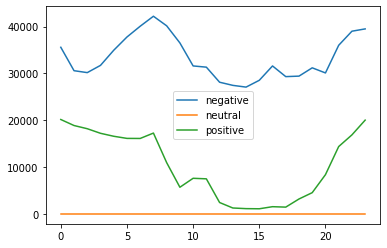

In [79]:
dataframe1.plot()

In [19]:
positive_tweet_count = 0
negative_tweet_count = 0
TweetList = list(data_subset['Text'])
targetList = list(data_subset['target'])
for i in range(len(data_subset['Text'])):
    if TweetList[i].find('@') != -1:
        
        if targetList[i] == 4:
            positive_tweet_count += 1
        else:
            negative_tweet_count += 1
all_counts = [positive_tweet_count, negative_tweet_count]

<BarContainer object of 2 artists>

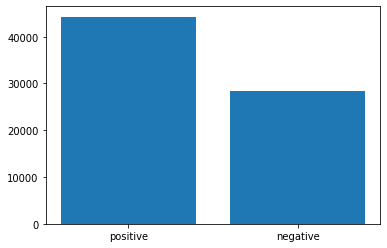

In [20]:
import matplotlib.pyplot as plt
names = ['positive', 'negative']
values = [positive_tweet_count, negative_tweet_count]
plt.bar(names, values)

In [21]:
import copy
newdatacopy = copy.deepcopy(data_subset)
newdatacopy.drop(['ids','date','flag','user'],axis = 1,inplace = True)

# Data preprocess

In [22]:
positive_data = dataset[dataset.target==4].iloc[:10000,:]
print(positive_data.shape)
negative_data = dataset[dataset.target==0].iloc[:10000,:]
print(negative_data.shape)
dataset = pd.concat([positive_data,negative_data],axis = 0)
print(dataset.shape)
dataset.head()

(10000, 6)
(10000, 6)
(20000, 6)


,target,ids,date,flag,user,Text
799994,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
799995,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
799996,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
799997,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
799998,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gsainicse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
dataset['Clean_Text'] = dataset['Text'].str.replace("@", "") 
dataset['Clean_Text'] = dataset['Clean_Text'].str.replace(r"http\S+", "") 
dataset['Clean_Text'] = dataset['Clean_Text'].str.replace("[^a-zA-Z]", " ") 
import nltk
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
dataset['Clean_Text'] = dataset['Clean_Text'].apply(lambda text : remove_stopwords(text.lower()))
dataset.head()

,target,ids,date,flag,user,Text,Clean_Text
799994,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
799995,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
799996,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
799997,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
799998,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/gsainicse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Text Tokenization and Normalization
dataset['Clean_Text'] = dataset['Clean_Text'].apply(lambda x: nltk.word_tokenize(x))
dataset.head()

,target,ids,date,flag,user,Text,Clean_Text
799994,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
799995,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,"[im, meeting, one, besties, tonight, cant, wai..."
799996,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, twitter, add, sunisa..."
799997,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,"[sick, really, cheap, hurts, much, eat, real, ..."
799998,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


In [27]:
dataset['Clean_Text'] = dataset['Clean_Text'].apply(lambda x: ' '.join([w for w in x]))
dataset['Clean_Text'] = dataset['Clean_Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataset.head()

,target,ids,date,flag,user,Text,Clean_Text
799994,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets guys best
799995,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,meeting besties tonight cant wait girl talk
799996,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter sunisa meet sho...
799997,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much real food plus fr...
799998,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


## Traning and testing using unigram

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(ngram_range=(1,1), min_df=1, use_idf=True, smooth_idf=True,stop_words='english')
cv2 = vectorizer2.fit_transform(dataset['Clean_Text'])
cv2.shape
print(cv2)

  (0, 2054)	0.3534399028375628
  (0, 9080)	0.3748192630125199
  (0, 23041)	0.619353833263846
  (0, 9409)	0.5220475799790407
  (0, 12984)	0.2801033891553844
  (1, 21565)	0.38309166609341405
  (1, 8570)	0.3691368833046239
  (1, 23723)	0.3271505304411654
  (1, 22423)	0.32861268559016577
  (1, 2062)	0.5797924231751967
  (1, 13816)	0.40719248038714695
  (2, 21419)	0.4110499859036693
  (2, 1138)	0.3775524404544633
  (2, 13814)	0.31764221793247116
  (2, 21235)	0.49343490832818665
  (2, 22954)	0.22181924181126098
  (2, 21903)	0.22679438183296802
  (2, 5210)	0.49343490832818665
  (3, 20400)	0.38050558768158743
  (3, 13281)	0.25149886994004944
  (3, 8119)	0.2851020715014969
  (3, 16799)	0.35518518559784246
  (3, 7873)	0.31886162872141144
  (3, 17753)	0.31642588390078275
  (3, 10064)	0.31354310496648796
  :	:
  (19995, 10172)	0.5302583440447596
  (19995, 14994)	0.5302583440447596
  (19995, 107)	0.4364497061844448
  (19995, 6443)	0.4134716769991094
  (19995, 8499)	0.27605253745052694
  (19996, 101

In [29]:
X_train,X_test,y_train,y_test = train_test_split(cv2,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)

In [80]:
clfone = SVC(kernel='linear') 
clfone.fit(X_train,y_train)
prediction_clfone = clfone.predict(X_test)
print('accuracy using unigram',end='  ')
print(accuracy_score(prediction_clfone,y_test))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_clfone))

accuracy using unigram  0.69225
             precision    recall  f1-score   support

          0       0.69      0.69      0.69      2000
          4       0.69      0.69      0.69      2000

avg / total       0.69      0.69      0.69      4000



##Traning and testing using bigram

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(ngram_range=(1,2), min_df=1, use_idf=True, smooth_idf=True,stop_words='english')
cv2 = vectorizer2.fit_transform(dataset['Clean_Text'])
cv2.shape
print(cv2)
X_train,X_test,y_train,y_test = train_test_split(cv2,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)
clfone = SVC(kernel='linear')
clfone.fit(X_train,y_train)
prediction_clfone = clfone.predict(X_test)
print('accuracy using unigram',end='  ')
print(accuracy_score(prediction_clfone,y_test))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_clfone))

  (0, 35632)	0.3841689393884714
  (0, 96069)	0.4000555572227571
  (0, 37606)	0.3841689393884714
  (0, 52249)	0.4000555572227571
  (0, 6855)	0.21922950229457622
  (0, 35626)	0.23249055870870278
  (0, 96067)	0.3841689393884714
  (0, 37595)	0.3238124224629279
  (0, 52096)	0.1737407862059675
  (1, 32525)	0.3523218128994157
  (1, 98366)	0.3668914499063155
  (1, 93070)	0.3523218128994157
  (1, 6998)	0.3668914499063155
  (1, 55638)	0.3668914499063155
  (1, 87632)	0.2259626086381422
  (1, 32456)	0.21773152610353866
  (1, 98320)	0.19296631542439222
  (1, 92929)	0.19382875233164995
  (1, 6995)	0.3419844909321284
  (1, 55635)	0.24017822163659197
  (2, 3652)	0.31660819708498844
  (2, 55583)	0.31660819708498844
  (2, 86264)	0.31660819708498844
  (2, 95759)	0.31660819708498844
  (2, 89279)	0.29511478976328404
  :	:
  (19997, 20665)	0.288508755474625
  (19997, 83646)	0.288508755474625
  (19997, 20691)	0.288508755474625
  (19997, 87730)	0.288508755474625
  (19997, 45012)	0.27705177591936136
  (19997, 

## Traning and testing using trigram

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(ngram_range=(1,3), min_df=1, use_idf=True, smooth_idf=True,stop_words='english')
cv2 = vectorizer2.fit_transform(dataset['Clean_Text'])
cv2.shape
print(cv2)
X_train,X_test,y_train,y_test = train_test_split(cv2,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)
clfone = SVC(kernel='linear') 
clfone.fit(X_train,y_train)
prediction_clfone = clfone.predict(X_test)
print('accuracy using trigram',end='  ')
print(accuracy_score(prediction_clfone,y_test))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_clfone))

  (0, 161343)	0.32882882911755973
  (0, 62567)	0.32882882911755973
  (0, 87208)	0.32882882911755973
  (0, 59081)	0.3157706979485994
  (0, 161342)	0.32882882911755973
  (0, 62565)	0.3157706979485994
  (0, 87207)	0.32882882911755973
  (0, 10976)	0.18019742319792506
  (0, 59071)	0.19109745339320885
  (0, 161339)	0.3157706979485994
  (0, 62546)	0.26616018152927723
  (0, 86917)	0.1428076132592283
  (1, 164968)	0.2957996694147519
  (1, 156240)	0.2957996694147519
  (1, 11261)	0.2957996694147519
  (1, 92922)	0.2957996694147519
  (1, 53170)	0.284053160164579
  (1, 164967)	0.2957996694147519
  (1, 156239)	0.284053160164579
  (1, 11260)	0.2957996694147519
  (1, 92921)	0.2957996694147519
  (1, 146464)	0.18217831173859383
  (1, 53041)	0.1755421486628858
  (1, 164877)	0.15557564049337477
  (1, 155984)	0.1562709648246533
  :	:
  (19997, 74720)	0.22625528715232787
  (19997, 139792)	0.2102604467862993
  (19997, 74719)	0.18762714787338988
  (19997, 15091)	0.1689143842350943
  (19997, 33454)	0.2262552871

## comperative accuracy analysis with other models

In [46]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(dataset['Clean_Text'])
cv.shape
X_train,X_test,y_train,y_test = train_test_split(cv,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)

In [81]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.703


/home/gsainicse/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train) 
prediction_clf = clf.predict(X_test) 
print(accuracy_score(prediction_clf,y_test)) 

0.69225


In [48]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42) 
rf.fit(X_train,y_train) 
prediction_rf = rf.predict(X_test) 
print(accuracy_score(prediction_rf,y_test)) 

0.68825


## plotting of ROC curve uisng svm with tfidf or without tfidf

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(ngram_range=(1,2), min_df=1, use_idf=True, smooth_idf=True,stop_words='english')
cv2 = vectorizer2.fit_transform(dataset['Clean_Text'])
X_train2,X_test2,y_train2,y_test2 = train_test_split(cv2,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)

In [35]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(dataset['Clean_Text'])
cv.shape
X_train,X_test,y_train,y_test = train_test_split(cv,dataset['target'], test_size=.2,stratify=dataset['target'], random_state=42)

In [36]:
import sklearn.metrics as metrics
clf2 = SVC(kernel='linear',probability=True) 
clf2.fit(X_train2,y_train2) 
y_pred_proba2 = clf2.predict_proba(X_test2)[::,1]

In [37]:
import sklearn.metrics as metrics
clf = SVC(kernel='linear',probability=True) 
clf.fit(X_train,y_train) 
y_pred_proba = clf.predict_proba(X_test)[::,1]

In [38]:
print(y_pred_proba2)
print(y_pred_proba)

[0.67773202 0.08869343 0.55914748 ... 0.73687308 0.67540339 0.64548409]
[0.70562923 0.08178532 0.4437414  ... 0.75483498 0.45634938 0.63517   ]


In [39]:
a2= [0] * 4000
i=0
for x in y_test2:
    a2[i]=x
    i=i+1

In [40]:
a= [0] * 4000
i=0
for x in y_test:
    a[i]=x
    i=i+1

In [41]:
for i in range(0,len(a2)):
    if(a2[i]==4):
        a2[i]=1

In [74]:
for i in range(0,len(a)):
    if(a[i]==4):
        a[i]=1

In [75]:
fpr2, tpr2, threshold2 = metrics.roc_curve(a2, y_pred_proba2)
roc_auc2 = metrics.auc(fpr2, tpr2)

In [76]:
fpr, tpr, threshold = metrics.roc_curve(a, y_pred_proba)
roc_auc= metrics.auc(fpr, tpr)

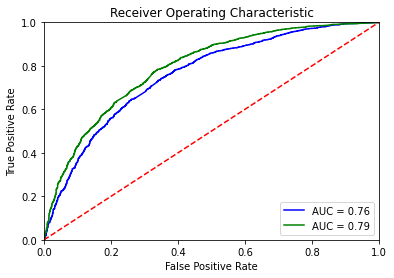

In [82]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## comparative study of all

In [49]:
y_pred_probarf = rf.predict_proba(X_test)[::,1]

In [50]:
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(a, y_pred_probarf)
roc_auc_rf= metrics.auc(fpr_rf, tpr_rf)

In [51]:
y_pred_proba_xgbc = xgbc.predict_proba(X_test)[::,1]
fpr_xgbc, tpr_xgbc, threshold_xgbc = metrics.roc_curve(a, y_pred_proba_xgbc)
roc_auc_xgbc= metrics.auc(fpr_xgbc, tpr_xgbc)

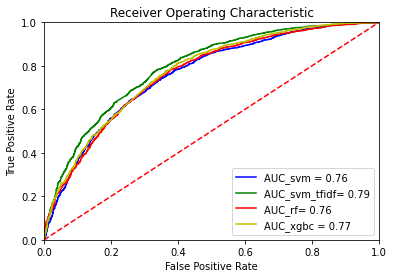

In [83]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC_svm = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'AUC_svm_tfidf= %0.2f' % roc_auc2)
plt.plot(fpr_rf, tpr_rf, 'r', label = 'AUC_rf= %0.2f' % roc_auc_rf)
plt.plot(fpr_xgbc, tpr_xgbc, 'y', label = 'AUC_xgbc = %0.2f' % roc_auc_xgbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SMDI

In [84]:
positive_post_list=[]
for i in range(24):
    positive_post_list.append(hour_data[i][2])
print(positive_post_list)

[20160, 18874, 18192, 17214, 16581, 16126, 16112, 17262, 10952, 5694, 7607, 7492, 2434, 1265, 1127, 1097, 1543, 1451, 3187, 4539, 8382, 14384, 16875, 20026]


In [85]:
def Average(lst): 
    return sum(lst) / len(lst) 
mean_positive=Average(positive_post_list)
print("mean of positive")
print(mean_positive)

mean of positive
10357.333333333334


In [86]:
sum_positive=sum(positive_post_list)
print("sum of positive")
print(sum_positive)

sum of positive
248576


In [87]:
variance_positive = sum([((x - mean_positive) ** 2) for x in positive_post_list]) / len(positive_post_list) 
sd_positive = variance_positive ** 0.5
print("positive standard deviation")
print(sd_positive)

positive standard deviation
7019.206577115551


In [88]:
p1=(sum_positive-mean_positive)/sd_positive
print(p1)

33.938118795836814


In [89]:
negative_post_list=[]
for i in range(24):
    negative_post_list.append(hour_data[i][0])
print(negative_post_list)

[35582, 30581, 30171, 31717, 34946, 37774, 40076, 42208, 40166, 36511, 31597, 31336, 28120, 27449, 27077, 28531, 31594, 29316, 29422, 31193, 30102, 36007, 39012, 39506]


In [90]:
def Average(lst): 
    return sum(lst) / len(lst) 
mean_negative=Average(negative_post_list)
print("mean of negative")
print(mean_negative)

mean of negative
33333.083333333336


In [91]:
sum_negative=sum(negative_post_list)
print("sum of negative")
print(sum_negative)

sum of negative
799994


In [92]:
variance_negative = sum([((x - mean_negative) ** 2) for x in negative_post_list]) / len(negative_post_list) 
sd_negative = variance_negative ** 0.5
print("negative standard deviation")
print(sd_negative)

negative standard deviation
4502.62196685319


In [93]:
p2=(sum_negative-mean_negative)/sd_negative
print(p2)

170.26988326147966


In [94]:
SMDI=p1-p2
print("SMDI INDEX")
print(SMDI)
print("most of the population are not in depression accoding to our dataset")

SMDI INDEX
-136.33176446564283
most of the population are not in depression accoding to our dataset


#Smdi compression in dya nd night

In [95]:
positive_post_list_n=[]
for i in range(21,24):
    positive_post_list_n.append(hour_data[i][2])
for i in range(6):
    positive_post_list_n.append(hour_data[i][2])
print(positive_post_list_n)
def Average(lst): 
    return sum(lst) / len(lst) 
mean_positive_n=Average(positive_post_list_n)
print("mean of positive in night")
print(mean_positive_n)
sum_positive_n=sum(positive_post_list_n)
print("sum of positive in night")
print(sum_positive_n)
variance_positive_n = sum([((x - mean_positive_n) ** 2) for x in positive_post_list_n]) / len(positive_post_list_n) 
sd_positive_n = variance_positive_n ** 0.5
print("positive post standard deviation in night")
print(sd_positive_n)
p1_n=(sum_positive_n-mean_positive_n)/sd_positive_n
print("p1 for night")
print(p1_n)

[14384, 16875, 20026, 20160, 18874, 18192, 17214, 16581, 16126]
mean of positive in night
17603.555555555555
sum of positive in night
158432
positive post standard deviation in night
1783.9038409006937
p1 for night
78.94396615758174


In [96]:
negative_post_list_n=[]
for i in range(21,24):
    negative_post_list_n.append(hour_data[i][0])
for i in range(6):
    negative_post_list_n.append(hour_data[i][0])
print(negative_post_list_n)
def Average(lst): 
    return sum(lst) / len(lst) 
mean_negative_n=Average(negative_post_list_n)
print("mean of negative in night")
print(mean_negative_n)
sum_negative_n=sum(negative_post_list_n)
print("sum of negative in night")
print(sum_negative_n)
variance_negative_n = sum([((x - mean_negative_n) ** 2) for x in negative_post_list_n]) / len(negative_post_list_n) 
sd_negative_n = variance_negative_n ** 0.5
print("negative post standard deviation in night")
print(sd_negative_n)
p2_n=(sum_negative_n-mean_negative_n)/sd_negative_n
print("p1 for night")
print(p2_n)

[36007, 39012, 39506, 35582, 30581, 30171, 31717, 34946, 37774]
mean of negative in night
35032.88888888889
sum of negative in night
315296
negative post standard deviation in night
3317.731837145654
p1 for night
84.47431102576091


In [97]:
SMDI_at_night=p1_n-p2_n
print("SMDI INDEX at night")
print(SMDI_at_night)

SMDI INDEX at night
-5.530344868179171


#smdi at day time

In [98]:
positive_post_list_day=[]
for i in range(7,22):
    positive_post_list_day.append(hour_data[i][2])
print(positive_post_list_day)
def Average(lst): 
    return sum(lst) / len(lst) 
mean_positive_day=Average(positive_post_list_day)
print("mean of positive in night")
print(mean_positive_day)
sum_positive_day=sum(positive_post_list_day)
print("sum of positive in night")
print(sum_positive_day)
variance_positive_day = sum([((x - mean_positive_day) ** 2) for x in positive_post_list_day]) / len(positive_post_list_day) 
sd_positive_day = variance_positive_day ** 0.5
print("positive post standard deviation in night")
print(sd_positive_day)
p1_day=(sum_positive_day-mean_positive_day)/sd_positive_day
print("p1 for day")
print(p1_day)

[17262, 10952, 5694, 7607, 7492, 2434, 1265, 1127, 1097, 1543, 1451, 3187, 4539, 8382, 14384]
mean of positive in night
5894.4
sum of positive in night
88416
positive post standard deviation in night
4936.821282296264
p1 for day
16.715533190542544


In [99]:
positive_post_list_day=[]
for i in range(7,22):
    positive_post_list_day.append(hour_data[i][0])
print(positive_post_list_day)
def Average(lst): 
    return sum(lst) / len(lst) 
mean_positive_day=Average(positive_post_list_day)
print("mean of positive in night")
print(mean_positive_day)
sum_positive_day=sum(positive_post_list_day)
print("sum of positive in night")
print(sum_positive_day)
variance_positive_day = sum([((x - mean_positive_day) ** 2) for x in positive_post_list_day]) / len(positive_post_list_day) 
sd_positive_day = variance_positive_day ** 0.5
print("positive post standard deviation in night")
print(sd_positive_day)
p2_day=(sum_positive_day-mean_positive_day)/sd_positive_day
print("p2 for day")
print(p2_day)

[42208, 40166, 36511, 31597, 31336, 28120, 27449, 27077, 28531, 31594, 29316, 29422, 31193, 30102, 36007]
mean of positive in night
32041.933333333334
sum of positive in night
480629
positive post standard deviation in night
4458.4992911167865
p2 for day
100.6139145430485


In [100]:
SMDI_at_day=p1_day-p2_day
print("SMDI INDEX at day")
print(SMDI_at_day)

SMDI INDEX at day
-83.89838135250595


<BarContainer object of 2 artists>

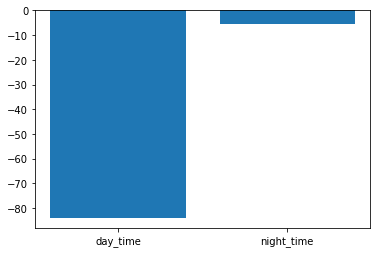

In [101]:
import matplotlib.pyplot as plt
window = ['day_time', 'night_time']
window_smdi = [SMDI_at_day, SMDI_at_night]
plt.bar(window, window_smdi)

this show that SMDI is higher at night


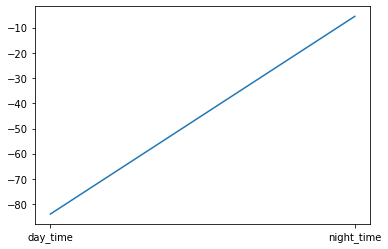

In [70]:
plt.plot(window, window_smdi)
print("this show that SMDI is higher at night")

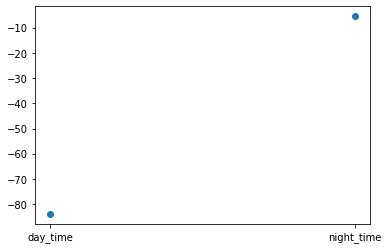

In [102]:
plt.scatter(window, window_smdi)
plt.show()